<a href="https://colab.research.google.com/github/chelomec/airlines_delay_prediction/blob/main/Proyecto_DataScienceII_ML_Clasificaci%C3%B3n_Demora_Vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMORAS EN VUELOS

##INTRODUCCIÓN

Con el creciente volumen de viajes aéreos y la complejidad de las operaciones aeroportuarias, la predicción precisa de retrasos y cancelaciones de vuelos es crucial para mejorar la eficiencia operativa y la experiencia del pasajero. Utilizando datos históricos de vuelos en EE.UU, se busca identificar patrones y factores determinantes que influyen en la puntualidad de los vuelos y definir de manera anticipada si un vuelo sufrirá un retraso o no.

###ABSTRACT
El presente estudio se centra en el análisis de datos históricos de vuelos operados por líneas aéreas estadounidenses durante el año 2019, con el fin de identificar los factores que influyen en la puntualidad y demoras en los vuelos operados por las diferentes líneas áreas. La puntualidad de los vuelos es un aspecto crítico para la eficiencia operativa de las aerolíneas y la satisfacción del pasajero, siendo la predicción de retrasos una tarea esencial en la gestión de operaciones aeroportuarias.

El dataset utilizado permite obtener datos sobre la fechas en que seralizaron los vuelos, datos operativos para cada vuelo, datos del operador, datos del aeropuerto y condiciones meteorológicas. Es con esta información que se buscará identificar patrones y relaciones significativas que puedan predecir retrasos.

###CONTEXTO COMERCIAL

La puntualidad es un factor esencial para las aerolíneas, un indicador clave de satisfacción del cliente y una ventaja competitiva. Las operaciones, incluyendo el diseño de rutas, la disponibilidad de recursos humanos y materiales, y la mejora de la experiencia del pasajero (donde la llegada a tiempo es crucial), como así también factores externos, influyen en el éxito o fracaso de una compañía.  Por lo tanto, el análisis de las demoras de vuelos mediante Data Science puede proporcionar información valiosa para optimizar las operaciones y mejorar la satisfacción del cliente.



###CONTEXTO ANALÍTICO
Por medio del análisis de los datos, y definiendo como variable objetivo si un vuelo se demorará o no, se utilizarán técnicas de machine learning basadas en modelos clasificatorios (como regresión logística, árboles de decisión y bosques aleatorios) para lograr responder a las preguntas previas y determinar, con la información disponible (hora de salida programada, aeropuerto de origen y destino, condiciones climáticas, historial de vuelos anteriores, entre otros), si un vuelo se demorará o no. El rendimiento del modelo se evaluará utilizando métricas como la precisión, el recall y el área bajo la curva ROC. Se reconocen los desafíos que pueden presentarse debido a la calidad de los datos y la cantidad de variables que pueden influir en la demora de un vuelo.

###HIPOTESIS
Considerando entonces los factores internos y externos que pueden afectar a la operación regularar de un vuelo, se buscará responder las siguientes preguntas:

1.   ¿Es posible predecir si un vuelo se demorará?
2.   ¿Existen factores internos y/o externos que influyen en la predicción?
3. ¿Existe estacionalidad en las demoras y sus posibles predicciones?
4. ¿Qué factores internos son los más preponderantes a influir en la demora?

##OBJETIVO
**Predicir si un vuelo sufrirá una demora mayor a los 15 min o no.**

##LIBRERIAS
Se deja en este espacio las librerías que se utilizan en el proyecto.

In [5]:
pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from branca.colormap import linear
import squarify

##DATASET

El dataset elegido para el desarrollo del caso son los datos de demoras de los vuelos de las aerolíneas en el año 2019 en función del clima y del aeropuerto. Este dataset se encuentra en kaggle en el siguiente link.

https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations

De igual manera, se conecta el dataset con el notebook para trabajar con el mismo.

In [3]:
dataset_dir = kagglehub.dataset_download("threnjen/2019-airline-delays-and-cancellations")

print("Path to dataset files:", dataset_dir)

# Se busca el archivo con el que vamos a trabajar
for filename in os.listdir(dataset_dir ):
    if filename.endswith("train.csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break

df = pd.read_csv(csv_file_path)
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/threnjen/2019-airline-delays-and-cancellations/versions/9


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [4]:
print(df.columns)

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
       'DEP_BLOCK_HIST'],
      dtype='object')


###GLOSARIO DE VARIABLES

Cada unas de la columnas del data set tienen el siguiente significado:

* MONTH: Mes
* DAY_OF_WEEK: Día de la semana
* DEP_DEL15: TARGET Binario de un retraso de salida de más de 15 minutos (1 es sí)
* DISTANCE_GROUP: Grupo de distancia que volará la aeronave que sale
* DEP_BLOCK: Bloque de salida
* SEGMENT_NUMBER: El segmento en el que se encuentra este número de cola para el día
* CONCURRENT_FLIGHTS: Vuelos simultáneos que salen del aeropuerto en el mismo bloque de salida
* NUMBER_OF_SEATS: Número de asientos en la aeronave
* CARRIER_NAME: Linea Aérea
* AIRPORT_FLIGHTS_MONTH: Promedio de vuelos del aeropuerto por mes
* AIRLINE_FLIGHTS_MONTH: Promedio de vuelos de la aerolínea por mes
* AIRLINE_AIRPORT_FLIGHTS_MONTH: Promedio de vuelos por mes para la aerolínea Y el aeropuerto
* AVG_MONTHLY_PASS_AIRPORT: Promedio de pasajeros para el aeropuerto de salida para el mes
* AVG_MONTHLY_PASS_AIRLINE: Promedio de pasajeros por aerolínea para el mes
* FLT_ATTENDANTS_PER_PASS: Auxiliares de vuelo por pasajero de la aerolínea
* GROUND_SERV_PER_PASS: Empleados de servicio en tierra (mostrador de servicio) por pasajero de la aerolínea
* PLANE_AGE: Antigüedad de la aeronave que sale
* DEPARTING_AIRPORT: Aeropuerto de salida
* LATITUDE: Latitud del aeropuerto de salida
* LONGITUDE: Longitud del aeropuerto de salida
* PREVIOUS_AIRPORT: Aeropuerto anterior del que salió la aeronave
* PRCP: Pulgadas de precipitación del día
* SNOW: Pulgadas de nevadas del día
* SNWD: Pulgadas de nieve en tierra del día
* TMAX: Temperatura máxima del día
* AWND: Velocidad máxima del viento del día
* CARRIER_HISTORICAL: Promedio de demoras por cada línea aérea por mes
* DEP_AIRPORT_HIST: Promedio de demoras por cada aeropuerto por mes
* DAY_HISTORIAL: Promedio de demoras por día de la semana por mes
* DEP_BLOCK_HIST: Promedio de demoras por bloque de tiempo por mes


In [5]:
df.shape

(4542343, 30)

Con shape se puede observar que el dataset se compone de más de 4 millones de registros y de 30 variables.

###DATA WRANGLING

Con el daset disponible, se comienza analizando el mismo para comprender la composición del mismo.

In [6]:
df.dtypes

,0
MONTH,int64
DAY_OF_WEEK,int64
DEP_DEL15,int64
DEP_TIME_BLK,object
DISTANCE_GROUP,int64
SEGMENT_NUMBER,int64
CONCURRENT_FLIGHTS,int64
NUMBER_OF_SEATS,int64
CARRIER_NAME,object
AIRPORT_FLIGHTS_MONTH,int64


Con dtype se puede observar cual es el tipo de datos con los que se van a trabajar, en donde la mayoría son del tipo númerico.

In [7]:
df.dtypes.value_counts()

,count
int64,13
float64,13
object,4


###CATEGORIZACIÓN

Para poder hacer un análisis preciso del dataset se debe conocer si existen valores nulos y con ello hacer el correcto tratamiento de los datos. Antes de continuar, se creara la variable DEP_TIME_BLK_HF que permitirá convertir el DEP_TIME_BLK en un formato númerico, el cual va permitir trabajar más adelante con el dataset tanto en las métricas como en el machine learning.

In [8]:
def extraer_hora(rango_tiempo):
    """Extrae la hora de inicio de un rango de tiempo."""
    return rango_tiempo.split('-')[0][:2]
df['DEP_TIME_BLK_HF'] = df['DEP_TIME_BLK'].apply(extraer_hora)
# Convertir la nueva columna 'Hora' a tipo numérico (entero)
df['DEP_TIME_BLK_HF'] = pd.to_numeric(df['DEP_TIME_BLK_HF'])
df.head(10)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,DEP_TIME_BLK_HF
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479,15
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503,13
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327,0
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037,15
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050,8
5,9,4,0,0800-0859,2,2,32,100,JetBlue Airways,11294,...,0.01,0.0,0.0,89.0,3.80,0.174758,0.144157,0.167321,0.084255,8
6,11,3,0,0700-0759,8,1,18,150,American Airlines Inc.,6491,...,0.00,0.0,0.0,69.0,11.18,0.142302,0.187867,0.147498,0.076535,7
7,8,6,1,1900-1959,3,1,39,154,United Air Lines Inc.,23099,...,0.00,0.0,0.0,84.0,8.95,0.221460,0.187867,0.161870,0.322358,19
8,7,3,0,0800-0859,11,1,48,173,United Air Lines Inc.,19667,...,0.00,0.0,0.0,72.0,8.05,0.236601,0.187867,0.203027,0.113050,8
9,7,2,1,2000-2059,1,6,3,99,American Airlines Inc.,4275,...,0.68,0.0,0.0,89.0,8.95,0.237709,0.243625,0.202012,0.336198,20


Esta misma lógica aplicamos para categorizar através de un número a los aeropuertos y aerolíneas.

In [9]:
aeropuertos_unicos = pd.concat([df['PREVIOUS_AIRPORT'].dropna(), df['DEPARTING_AIRPORT'].dropna()]).unique()# Combinamos los aeropuertos únicos
aeropuerto_a_numero = {aeropuerto: numero + 1 for numero, aeropuerto in enumerate(aeropuertos_unicos)} #empezamos en 1
aeropuerto_a_numero[np.nan] = 0 #asignamos 0 a los valores NaN

# Aplicamos la codificación
df['PREVIOUS_AIRPORT_NUM'] = df['PREVIOUS_AIRPORT'].map(aeropuerto_a_numero)
df['DEPARTING_AIRPORT_NUM'] = df['DEPARTING_AIRPORT'].map(aeropuerto_a_numero)

In [10]:
df['PREVIOUS_AIRPORT'] = df['PREVIOUS_AIRPORT'].replace('NONE', np.nan)
df['DEPARTING_AIRPORT'] = df['DEPARTING_AIRPORT'].replace('NONE', np.nan)

In [11]:
aerolineas = df['CARRIER_NAME'].unique()

aerolinea_numero = {aerolinea: numero + 1 for numero, aerolinea in enumerate(aerolineas)} #empezamos en 1

# Aplicamos la codificación
df['CARRIER_NAME_NUM'] = df['CARRIER_NAME'].map(aerolinea_numero)

Para poder trabajar con grupos de valores más adelantes, categorizamos a los grupos horarios de DEP_TIME_BLOCK en momentos del día.

In [12]:
momento_dia = ['madrugada','mañana','mediodía','tarde','noche']
#Con el siguiente código definimos una función que permitira separa los valores y quedarse con el valor que se encuentra a la izquierda del signo '-' y asigna luego el momento del día según el valor encontrado
df['moment'] = pd.cut(df['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])), bins=[0, 600, 1200, 1700, 2000, 2400],labels=momento_dia, right=False)

Lo mismo hacemos con las estaciones del año.

In [13]:
estacion = {1:'invierno',2:'invierno',3:'primavera',4:'primavera',5:'primavera',6:'verano',7:'verano',8:'verano',9:'otoño',10:'otoño',11:'otoño',12:'invierno'}
# Aplicamos la codificación
df['season'] = df['MONTH'].map(estacion)

Comenzamos explorando el dataset utilizando el describe

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,4542343.0,6.607797e+00,3.396624e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
DAY_OF_WEEK,4542343.0,3.936490e+00,1.995264e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DEP_DEL15,4542343.0,1.891442e-01,3.916232e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DISTANCE_GROUP,4542343.0,3.820224e+00,2.381773e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
SEGMENT_NUMBER,4542343.0,3.047252e+00,1.758031e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
CONCURRENT_FLIGHTS,4542343.0,2.784461e+01,2.151413e+01,1.000000,1.100000e+01,2.300000e+01,3.900000e+01,1.090000e+02
NUMBER_OF_SEATS,4542343.0,1.337606e+02,4.647480e+01,44.000000,9.000000e+01,1.430000e+02,1.720000e+02,3.370000e+02
AIRPORT_FLIGHTS_MONTH,4542343.0,1.268924e+04,8.841531e+03,1100.000000,5.345000e+03,1.156200e+04,1.761500e+04,3.525600e+04
AIRLINE_FLIGHTS_MONTH,4542343.0,6.296192e+04,3.437931e+04,5582.000000,2.503400e+04,7.087800e+04,8.631200e+04,1.177280e+05
AIRLINE_AIRPORT_FLIGHTS_MONTH,4542343.0,3.460356e+03,4.253083e+03,1.000000,6.550000e+02,2.251000e+03,4.806000e+03,2.183700e+04


In [15]:
df.describe(include='object').T

,count,unique,top,freq
DEP_TIME_BLK,4542343,19,0800-0859,316638
CARRIER_NAME,4542343,17,Southwest Airlines Co.,907076
DEPARTING_AIRPORT,4542343,96,Atlanta Municipal,275230
PREVIOUS_AIRPORT,3528040,355,Atlanta Municipal,145174
season,4542343,4,verano,1200889


In [16]:
df.dtypes

,0
MONTH,int64
DAY_OF_WEEK,int64
DEP_DEL15,int64
DEP_TIME_BLK,object
DISTANCE_GROUP,int64
SEGMENT_NUMBER,int64
CONCURRENT_FLIGHTS,int64
NUMBER_OF_SEATS,int64
CARRIER_NAME,object
AIRPORT_FLIGHTS_MONTH,int64


####VALORES NULOS

In [17]:
nulls = df.isnull().sum()
print(nulls)

MONTH                                  0
DAY_OF_WEEK                            0
DEP_DEL15                              0
DEP_TIME_BLK                           0
DISTANCE_GROUP                         0
SEGMENT_NUMBER                         0
CONCURRENT_FLIGHTS                     0
NUMBER_OF_SEATS                        0
CARRIER_NAME                           0
AIRPORT_FLIGHTS_MONTH                  0
AIRLINE_FLIGHTS_MONTH                  0
AIRLINE_AIRPORT_FLIGHTS_MONTH          0
AVG_MONTHLY_PASS_AIRPORT               0
AVG_MONTHLY_PASS_AIRLINE               0
FLT_ATTENDANTS_PER_PASS                0
GROUND_SERV_PER_PASS                   0
PLANE_AGE                              0
DEPARTING_AIRPORT                      0
LATITUDE                               0
LONGITUDE                              0
PREVIOUS_AIRPORT                 1014303
PRCP                                   0
SNOW                                   0
SNWD                                   0
TMAX            

Podemos observar que el data set no pose valores nulos, lo que implica que no es necesario realizar tratamiento de estos. Sin embargo, la ausencia de valores NaN no implica que haya valores que se identifiquen como no nulos. Para esto se buscará valores nulos representados por el valor 0 en variables que no deberían serlo. Esto solo en variables númericas.



In [18]:
col = ['MONTH','DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER','CONCURRENT_FLIGHTS','NUMBER_OF_SEATS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH','AVG_MONTHLY_PASS_AIRPORT','AVG_MONTHLY_PASS_AIRLINE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','PLANE_AGE','LATITUDE',
       'LONGITUDE','PRCP','SNOW','SNWD','TMAX','AWND','CARRIER_HISTORICAL','DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST','DEP_TIME_BLK_HF']

for i in col:
    col_w_zeros = (df[i] == 0).sum()
    if col_w_zeros > 0:
        print(f'La columna {i} tiene {col_w_zeros} registros de valores con cero')

La columna FLT_ATTENDANTS_PER_PASS tiene 489195 registros de valores con cero
La columna PLANE_AGE tiene 84396 registros de valores con cero
La columna PRCP tiene 3189027 registros de valores con cero
La columna SNOW tiene 4428715 registros de valores con cero
La columna SNWD tiene 4421479 registros de valores con cero
La columna TMAX tiene 61 registros de valores con cero
La columna AWND tiene 368 registros de valores con cero
La columna DEP_TIME_BLK_HF tiene 103919 registros de valores con cero


Con esto se observa que solo solo 8 variables tienen valores 0, de los cuales se puede observar, según el glosario es factible que estos valores tengan como valor 0 y no implique que sea un valor nulo. Ahora se hará el mismo análisis con las variables del tipo objecto.

In [19]:
col = ['DEP_TIME_BLK','CARRIER_NAME','DEPARTING_AIRPORT','PREVIOUS_AIRPORT']

for i in col:
    col_w_blanks = (df[i] == 'NONE').sum()  # Cuenta cuántos valores son 0 en la columna
    if col_w_blanks > 0:
        print(f'La columna {i} tiene {col_w_blanks} registros con blancos')

Con el análisis encontramos que el PREVIOUS_AIRPORT presenta valores NONE, lo que implica que el vuelo no tiene vuelo previo asignado. Esto es lógico, ya que es posible que el vuelo sea el primero del día.

Con los procesos anteriores, aseguramos de no dejar valores nulos o no deseados para el posterior análisis del dataset.

####VALORES DUPLICADOS

In [20]:
df_duplicados = df.duplicated(keep='last')

In [21]:
df = df.drop_duplicates()
df.shape

(4527988, 36)

En este paso se realizó el tratamiento de valores duplicados, reduciendo más de 14 mil registros duplicados en el dataset.

####OUTLINERS

Para detectar Outliners se deben analizar la variables númericas (float y int) no Booleanas. Para esto, se utilizará el boxplot para poder identificar si dentro de las variables mencionadas encontramos este tipo de valores. Debido a la cantidad de datos que se disponen en el dataset, se analizará en cuatro categorías:

* Línea Aérea
* Aeropuerto
* Climatología
* Fecha

#####OUTLINERS - LINEA AEREA

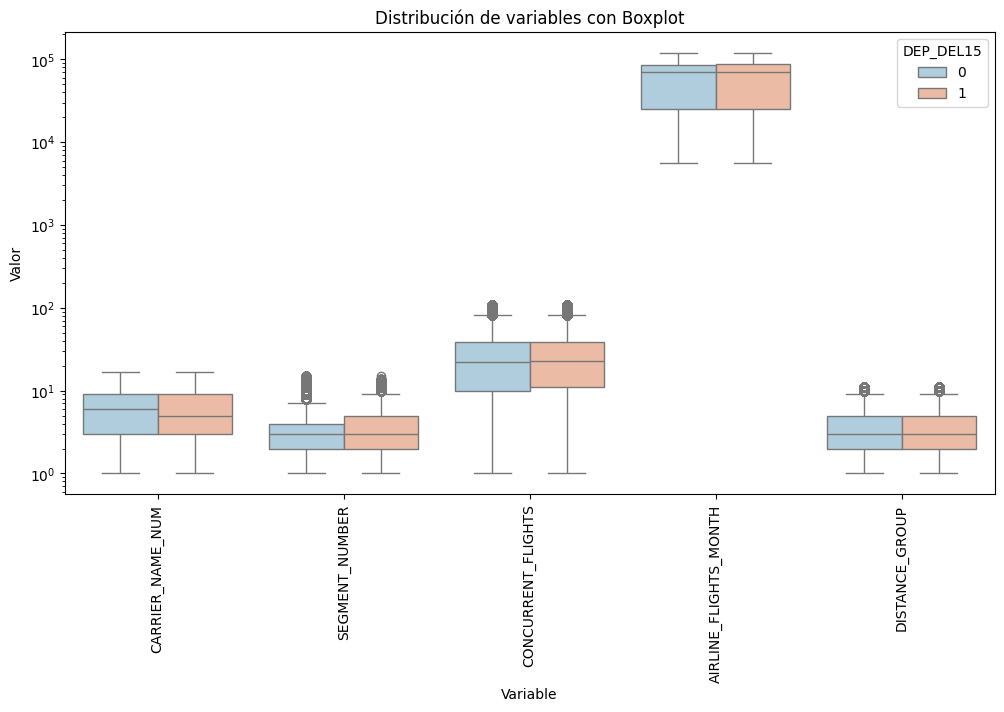

In [22]:
col_airline = ['CARRIER_NAME_NUM','SEGMENT_NUMBER','CONCURRENT_FLIGHTS','AIRLINE_FLIGHTS_MONTH','DISTANCE_GROUP'
              ]

bp = df[col_airline+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.yscale("log")  # Usar escala logarítmica si hay valores con grandes diferencias de magnitud
plt.title("Distribución de variables con Boxplot")
plt.show()

#####OUTLINERS - AEROPUERTO

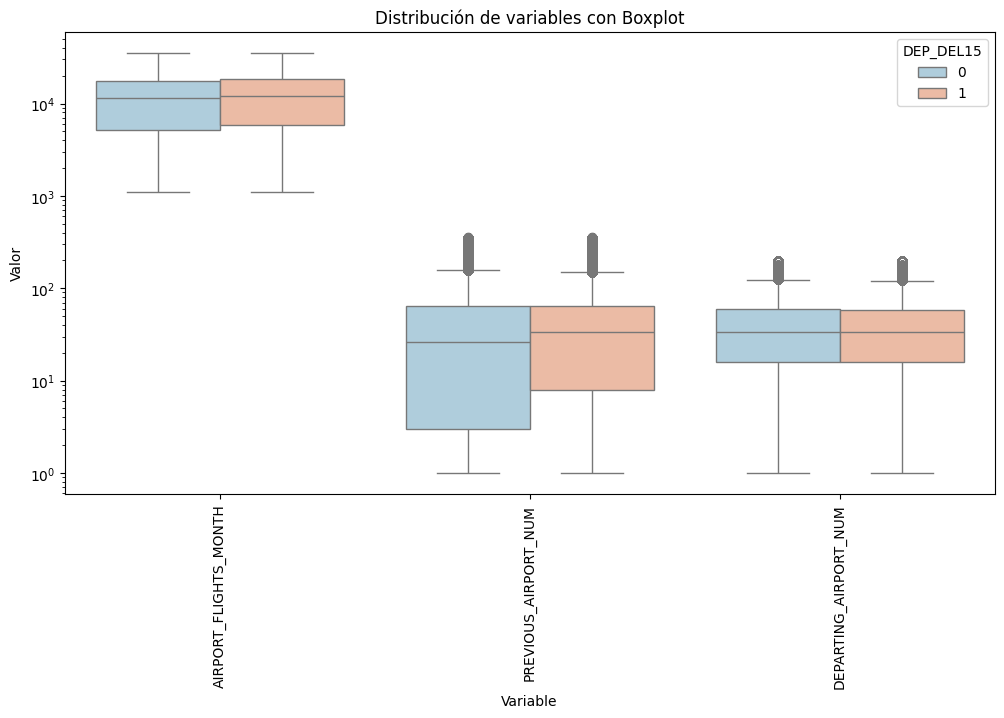

In [23]:
col_airport = ['AIRPORT_FLIGHTS_MONTH','PREVIOUS_AIRPORT_NUM','DEPARTING_AIRPORT_NUM'
              ]

bp = df[col_airport+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.yscale("log")  # Usar escala logarítmica si hay valores con grandes diferencias de magnitud
plt.title("Distribución de variables con Boxplot")
plt.show()

#####OUTLINERS - CLIMA

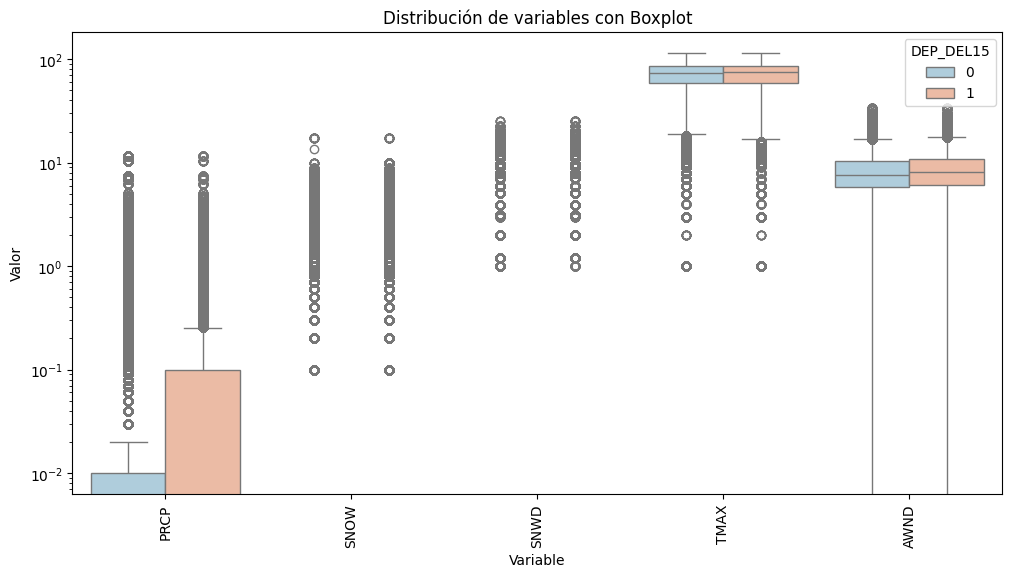

In [24]:
col_weather = ['PRCP','SNOW','SNWD','TMAX','AWND'
              ]

bp = df[col_weather+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Distribución de variables con Boxplot")
plt.show()

#####OUTLINERS - FECHA

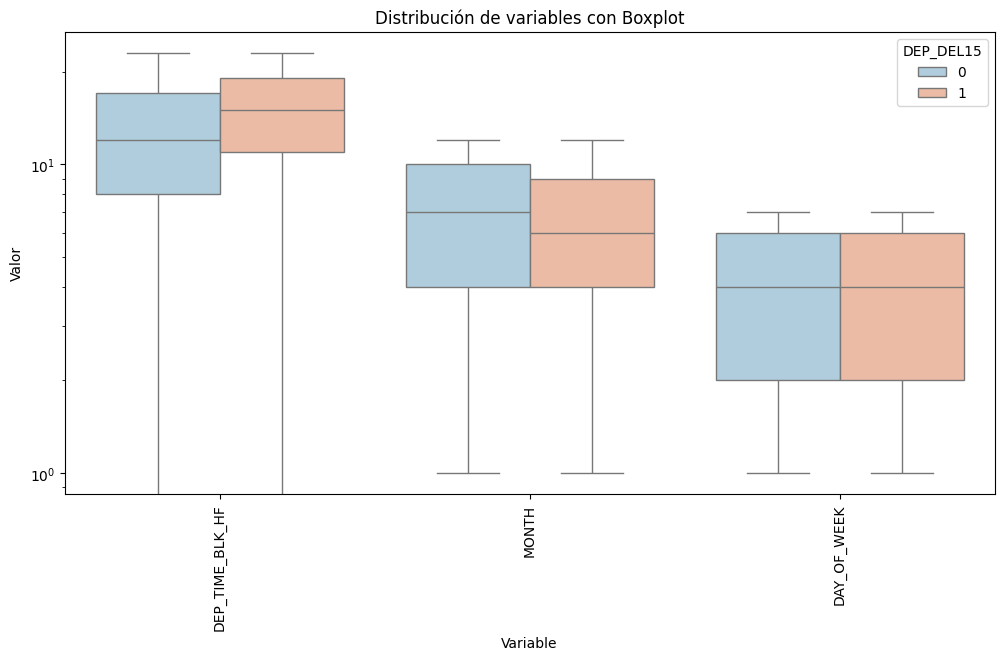

In [25]:
col_date = ['DEP_TIME_BLK_HF','MONTH','DAY_OF_WEEK'
              ]

bp = df[col_date+['DEP_DEL15']]# Filtramos el dataset solo con las columnas seleccionadas

bp_melted = bp.melt(id_vars=["DEP_DEL15"], var_name="Variable", value_name="Valor")# Transformamos el DataFrame a formato largo

# Graficamos
plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Valor", hue="DEP_DEL15",data=bp_melted, palette="RdBu_r")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Distribución de variables con Boxplot")
plt.show()

Con este análisis se puede observar que outliners no representan grandes variaciones si se catalogan según la variable objetivo, es decir, se puede observar que la cantidad y valores de los outliners detectados son similares en ambas categorías.

Si se puede observar que al analizar ambas categorías los los máximos y mínimos son similares, pero podemos obervar variaciones en los quartiles, esto implica que hay variables que pueden afectar en la variable objetivo.

#ANALISIS EXPLORATORIO DE DATOS


####Análisis - Aeropuertos

In [26]:
airport_counts = df['DEPARTING_AIRPORT'].value_counts().reset_index()
airport_counts.columns = ['DEPARTING_AIRPORT', 'Total']

airport_locations = df.groupby('DEPARTING_AIRPORT').first()[['LATITUDE', 'LONGITUDE']].reset_index()#Nos traemos las ubicaciones de los aeropuertos.

airport_counts_locations = pd.merge(airport_counts, airport_locations, on='DEPARTING_AIRPORT')

#Utilizamos folium para poder realizar el gráfico
m = folium.Map(
    location=[37.09, -95.72],
    zoom_start=5,
    tiles='cartodb positron'
)

# Crear una escala de colores basada en los valores
colormap = linear.RdBu_04.scale(airport_counts_locations['Total'].min(), airport_counts_locations['Total'].max())

# Agregamos cada aeropuerto al mapa
for idx, row in airport_counts_locations.iterrows():
      tooltip_text = f"""
      <h5><b>Location:</b> {row['DEPARTING_AIRPORT']}</h5>
      <h5><b>Magnitude:</b> {row['Total']}</h5>
   """
      color = colormap(row['Total'])  # Determinar el color según la escala

      folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=np.sqrt(row['Total']) / 10,  # Ajusta el radio según sea necesario
        fill=True,
        fill_color=color,
        fill_opacity=0.5,
        weight=1,
        tooltip=folium.Tooltip(tooltip_text, sticky=True),
    ).add_to(m)


# Agregar la barra de colores al mapa
colormap.caption = "Número de salidas por aeropuerto"
colormap.add_to(m)

m.save("airport_map.html") #guardar el mapa en un archivo html

# Mostrar el mapa en Colab
folium.Figure().add_child(m)

<ipython-input-27-bbde718e226e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_filtered.groupby(['DEPARTING_AIRPORT', 'moment']).size().unstack(fill_value=0)


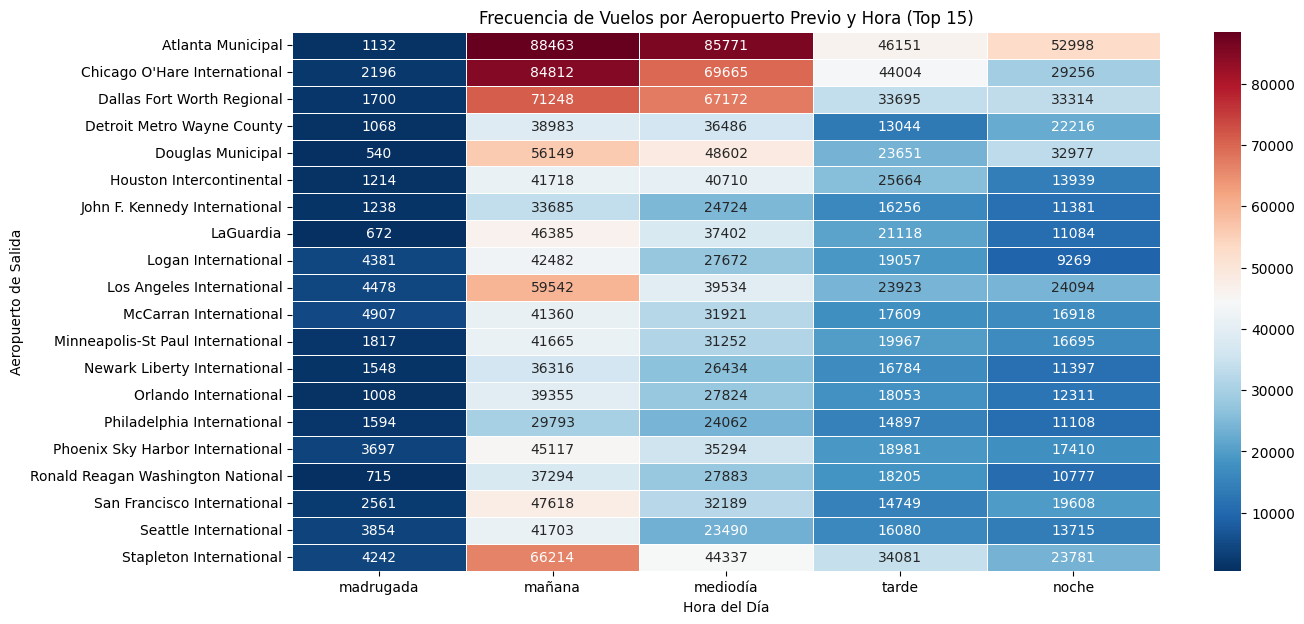

In [27]:
# Obtenemos los 20 aeropuertos con mayores salidas
top_airports = df['DEPARTING_AIRPORT'].value_counts().nlargest(20).index
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Agrupamos y pivoteamos los datos
heatmap_data = df_filtered.groupby(['DEPARTING_AIRPORT', 'moment']).size().unstack(fill_value=0)

#Gráfico
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="RdBu_r", annot=True, fmt="d", linewidths=0.5)
plt.xlabel('Hora del Día')
plt.ylabel('Aeropuerto de Salida')
plt.title('Frecuencia de Vuelos por Aeropuerto Previo y Hora (Top 15)')

plt.show()

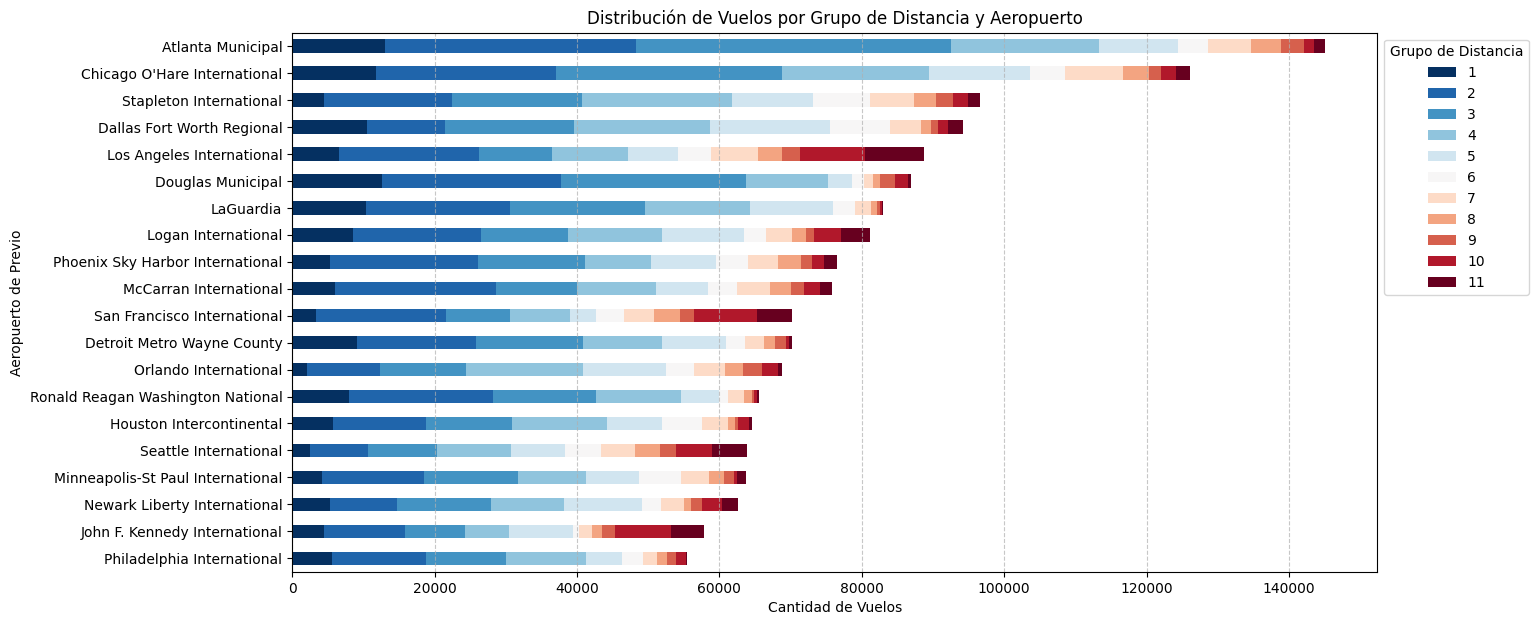

In [28]:
# Obtener los 20 aeropuertos previos más comunes
top_airports = df['PREVIOUS_AIRPORT'].value_counts().nlargest(20).index
df_filtered = df[df['PREVIOUS_AIRPORT'].isin(top_airports)]

# Contamos los vuelos por aeropuerto y grupo de distancia
df_counts = df_filtered.groupby(['PREVIOUS_AIRPORT', 'DISTANCE_GROUP']).size().unstack(fill_value=0)

# Ordenamos los aeropuertos por la suma de vuelos (de mayor a menor)
df_counts = df_counts.loc[df_counts.sum(axis=1).sort_values(ascending=True).index]

#Gráfico
df_counts.plot(kind='barh', stacked=True, colormap="RdBu_r", figsize=(14,7))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel('Aeropuerto de Previo')
plt.xlabel('Cantidad de Vuelos')
plt.title('Distribución de Vuelos por Grupo de Distancia y Aeropuerto')
plt.legend(title="Grupo de Distancia", bbox_to_anchor=(1, 1))

plt.show()

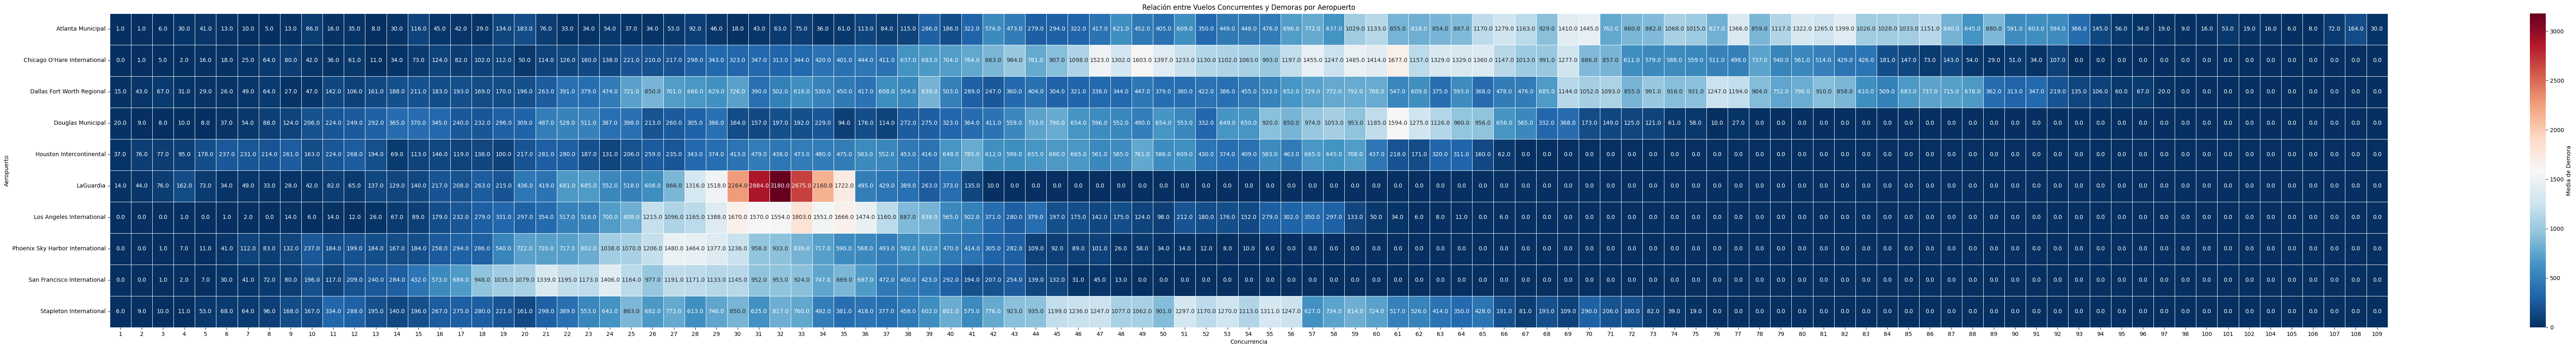

In [79]:
# Filtramos los 10 aeropuertos con más vuelos (por total de vuelos)
top_airports = df['DEPARTING_AIRPORT'].value_counts().nlargest(10).index

# Filtramos el dataframe para que solo contenga los top 10 aeropuertos
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Creamos la tabla de contingencia
df_contingency = df_filtered.pivot_table(values='DEP_DEL15',
                                         index='DEPARTING_AIRPORT',
                                         columns='CONCURRENT_FLIGHTS',
                                         aggfunc='sum',
                                         fill_value=0)

# Grafico
plt.figure(figsize=(90, 10))
sns.heatmap(df_contingency, annot=True, cmap='RdBu_r', fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Media de Demora'})
plt.title('Relación entre Vuelos Concurrentes y Demoras por Aeropuerto')
plt.xlabel('Concurrencia')
plt.ylabel('Aeropuerto')

plt.show()


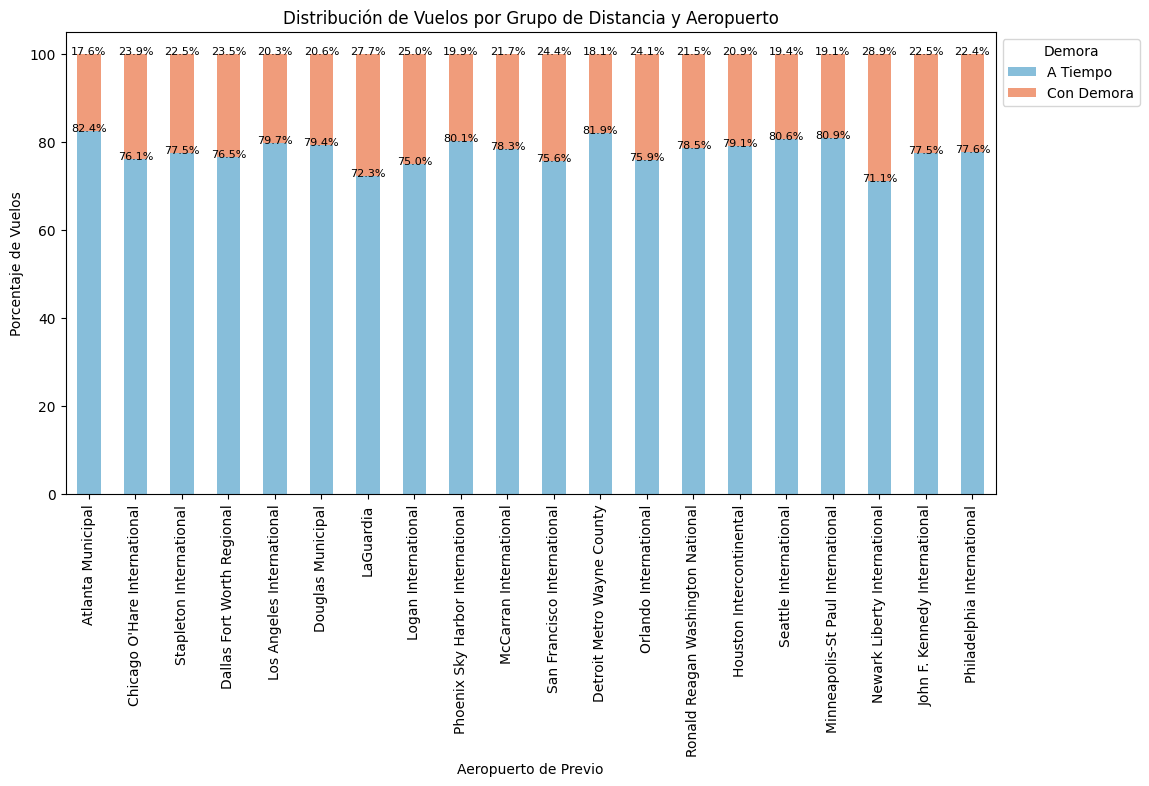

In [29]:
# Obtener los 20 aeropuertos previos más comunes
top_airports = df['PREVIOUS_AIRPORT'].value_counts().nlargest(20).index
df_filtered = df[df['PREVIOUS_AIRPORT'].isin(top_airports)]

# Contamos los aeropuertos en función de las demoras
df_counts = df_filtered.groupby(['PREVIOUS_AIRPORT', 'DEP_DEL15']).size().unstack(fill_value=0)

# Ordenamos los aeropuertos por la suma de vuelos (de mayor a menor)
df_counts = df_counts.loc[df_counts.sum(axis=1).sort_values(ascending=False).index]

# Calculamos el total de vuelos por aeropuerto y el porcentaje de cada categoría
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100  # Convertir a porcentaje

# OUtilizamos la paleta de colores RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

#Gráfico
ax = df_percent.plot(kind='bar', stacked=True, color=[colors[1],colors[4]], figsize=(12,6))

# Agregamos etiquetas con los valores porcentuales en la parte superior de cada barra
for index, row in enumerate(df_percent.itertuples()):
    total_height = 0  # Acumulador de altura
    for i, value in enumerate(row[1:]):  # Omitimos el índice del DataFrame
        if value > 0:  # Evita mostrar etiquetas en valores 0%
            ax.text(index, total_height + value, f"{value:.1f}%",
                    ha='center', fontsize=8, color='black')
        total_height += value  # Acumulamos la altura
plt.xlabel('Aeropuerto de Previo')
plt.ylabel('Porcentaje de Vuelos')
plt.title('Distribución de Vuelos por Grupo de Distancia y Aeropuerto')
plt.legend(title="Demora", labels=["A Tiempo", "Con Demora"], bbox_to_anchor=(1, 1))

plt.show()

**CONCLUSIONES**

1. Con los gráficos podemos observar que el aeropuerto con mayor tránsito de vuelos es el de Atlanta.

2. Además, el este se tiene mayor tránsito que en el oeste, y prácticamente en el centro del país no hay tráfico aéreo.

3. En el oeste se puede observar una mayor concentración en dos puntos siendo esto los aeropuertos de Los Ángeles y de San Francisco.

4. En el este se posee una mayor cantidad de aeropuertos distribuidos a lo largo de la costa atlántica, pero los aeropuertos con mayor flujo se encuentran más oeste de la costa.

5. La cantidad de vuelos operados en franjas horarias, la mayoría de los vuelos salen durante la mañana y el mediodía, mientras que durante la noche y la madrugada la actividad se reduce de manera significativa. (En el gráfico se muestran los 20 aeropuertos con mayor cantidad de salidas).

6. La mayoría de aeropuertos son utilizados para vuelos de corta y media distancia, pero se pueden observar casos como el Aeropuerto de los Angeles, San Francisco y Kennedy donde se observan una mayor presencia de vuelos de larga distancia.

7. Respecto a la demora la media de la misma es menor al 80% para los aeropuertos con mayor cantidad de tráfico. Sin embargo, se puede observar que al aumentar el tráfico la cantidad de demoras es más alta, viendo como ejemplo, el aeropuerto de la Guardia al superar los 19 vuelos concurrentes la cantidad de vuelos demorados acumulados se duplica. Solo con 10 vuelos más la cantidad aumenta por 10.


####Análisis - Lineas Aéreas

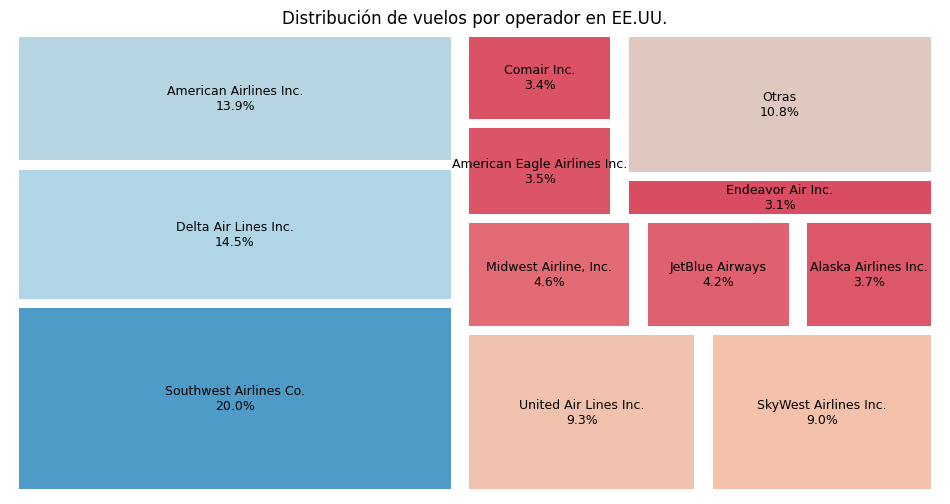

In [30]:
# Obtenemos la cantidad de vuelos por aerolínea
airline_flights = df['CARRIER_NAME'].value_counts().reset_index()
airline_flights.columns = ['Carrier_Name', 'Total']

# Calculamos el total de vuelos y porcentaje de cada aerolínea
total_flights = airline_flights['Total'].sum()
airline_flights['Percentage'] = (airline_flights['Total'] / total_flights) * 100

# Definir el umbral del 3%
threshold = 3

# Separamos aerolíneas principales y las que serán agrupadas en "Otros"
major_airlines = airline_flights[airline_flights['Percentage'] >= threshold]
other_flights = airline_flights[airline_flights['Percentage'] < threshold]['Total'].sum()
other_percentage = (other_flights / total_flights) * 100

# Si hay aerolíneas en "Otros", las agregamos a la tabla como una único, solo para efectos gráficos
if other_flights > 0:
    other_row = pd.DataFrame({'Carrier_Name': ['Otras'], 'Total': [other_flights], 'Percentage': [other_percentage]})
    major_airlines = pd.concat([major_airlines, other_row], ignore_index=True)

# Definir la escala de colores RdBu_04
colormap = linear.RdBu_04.scale(major_airlines['Total'].min(), major_airlines['Total'].max())

# Asignamos los colores según la escala
colors = [colormap(v) for v in major_airlines['Total']]

# Creaamos etiquetas con nombre y porcentaje
labels = [f"{row['Carrier_Name']}\n{row['Percentage']:.1f}%" for _, row in major_airlines.iterrows()]

# Gráfico
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=major_airlines['Total'],
    label=labels,
    color=colors,
    alpha=0.7,
    text_kwargs={'fontsize': 9, 'color': 'Black'},
    pad=True
)

plt.title('Distribución de vuelos por operador en EE.UU.')
plt.axis('off')

plt.show()

<ipython-input-31-eb43822b59fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='CARRIER_NAME', y='AVG_MONTHLY_PASS_AIRLINE', palette='RdBu_r')
<ipython-input-31-eb43822b59fd>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Aerolínea', bbox_to_anchor=(1, 1))


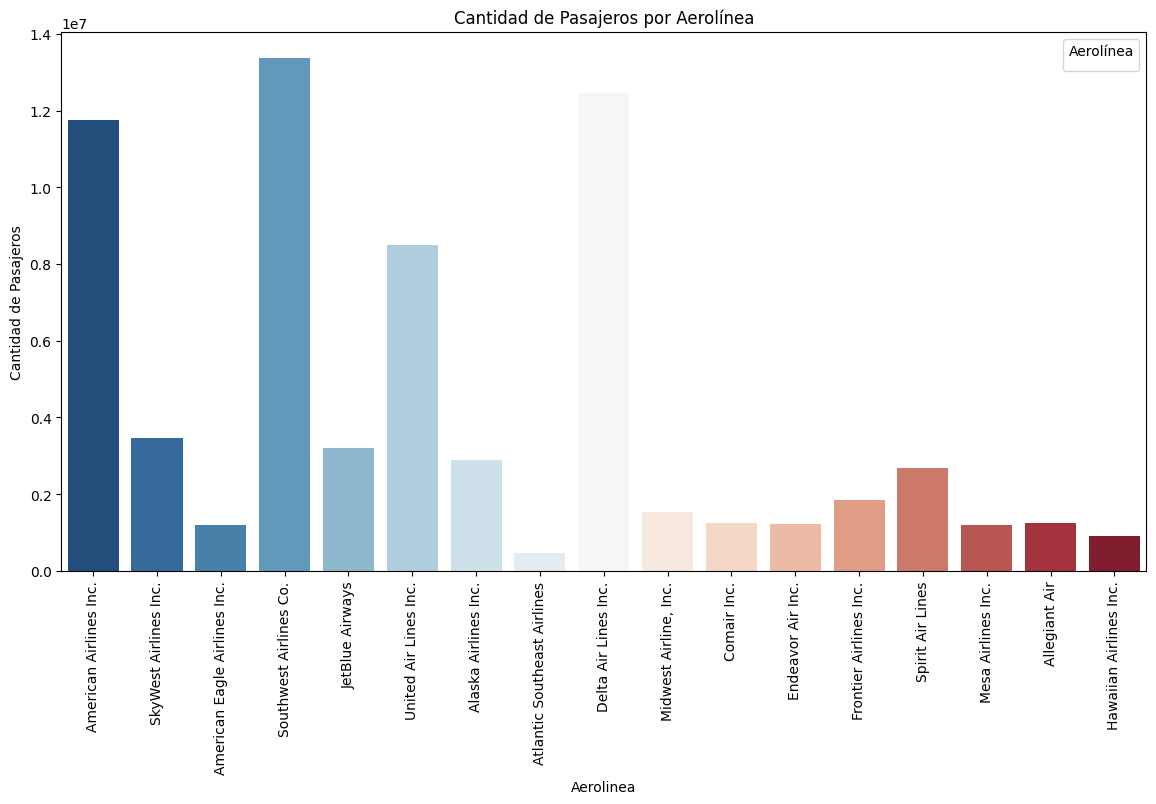

In [31]:
#Gráficamos
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='CARRIER_NAME', y='AVG_MONTHLY_PASS_AIRLINE', palette='RdBu_r')
plt.title('Cantidad de Pasajeros por Aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=90)
plt.legend(title='Aerolínea', bbox_to_anchor=(1, 1))

plt.show()

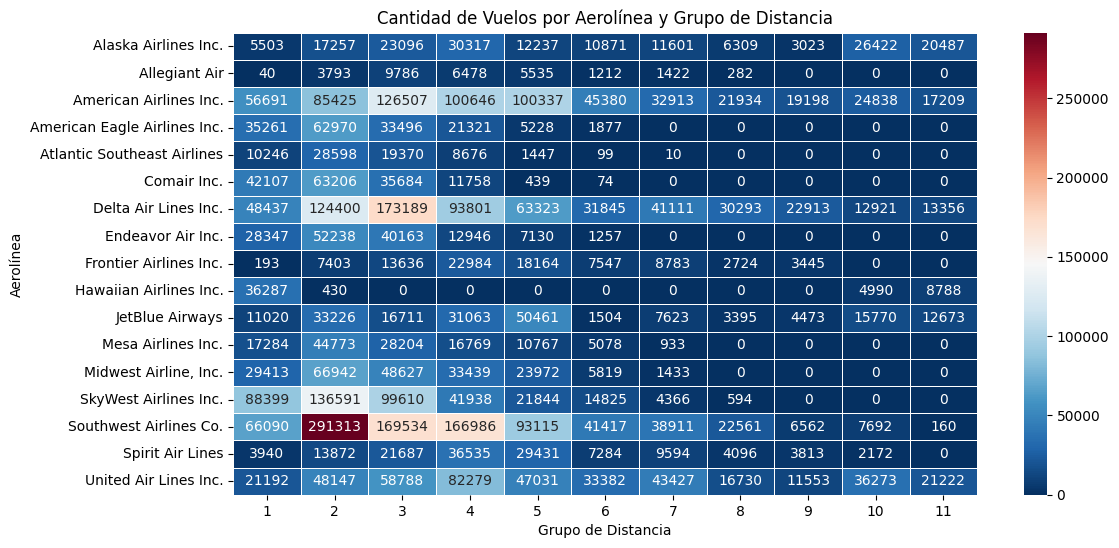

In [32]:
# Contamos la cantidad de vuelos por aerolínea y grupo de distancia
heatmap_data = df.groupby(['CARRIER_NAME', 'DISTANCE_GROUP']).size().unstack(fill_value=0)

# Gráfico
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="RdBu_r", annot=True, fmt="d", linewidths=0.5)
plt.xlabel('Grupo de Distancia')
plt.ylabel('Aerolínea')
plt.title('Cantidad de Vuelos por Aerolínea y Grupo de Distancia')

plt.show()

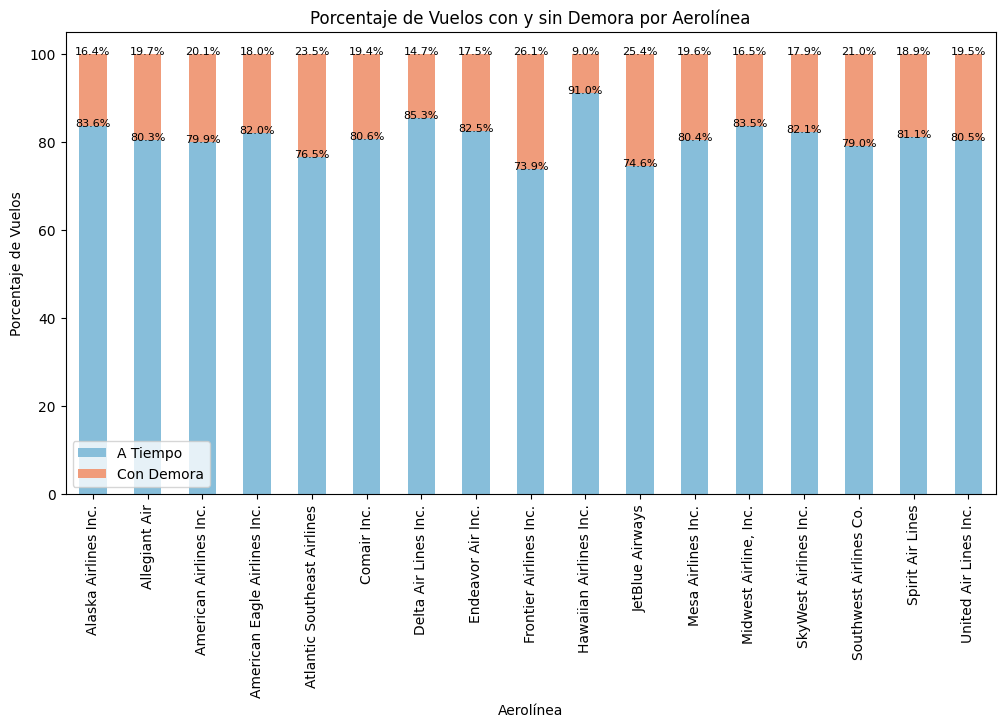

In [33]:
# Contamos vuelos con y sin demora por aerolínea
df_counts = df.groupby(['CARRIER_NAME', 'DEP_DEL15']).size().unstack(fill_value=0)

# Calculamos el total de vuelos por aerolínea y el porcentaje de cada categoría
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100  # Convertir a porcentaje

# Obtenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

#Gráfico
ax = df_percent.plot(kind='bar', stacked=True, color=[colors[1],colors[4]], figsize=(12,6))

# Agregar etiquetas con los valores porcentuales en la parte superior de cada barra
for index, row in enumerate(df_percent.itertuples()):
    total_height = 0  # Acumulador de altura
    for i, value in enumerate(row[1:]):  # Omitimos el índice del DataFrame
        if value > 0:  # Evita mostrar etiquetas en valores 0%
            ax.text(index, total_height + value, f"{value:.1f}%",
                    ha='center', fontsize=8, color='black')
        total_height += value  # Acumulamos la altura

# Configuración del gráfico
plt.ylabel('Porcentaje de Vuelos')
plt.xlabel('Aerolínea')
plt.title('Porcentaje de Vuelos con y sin Demora por Aerolínea')
plt.legend(['A Tiempo', 'Con Demora'])

plt.show()

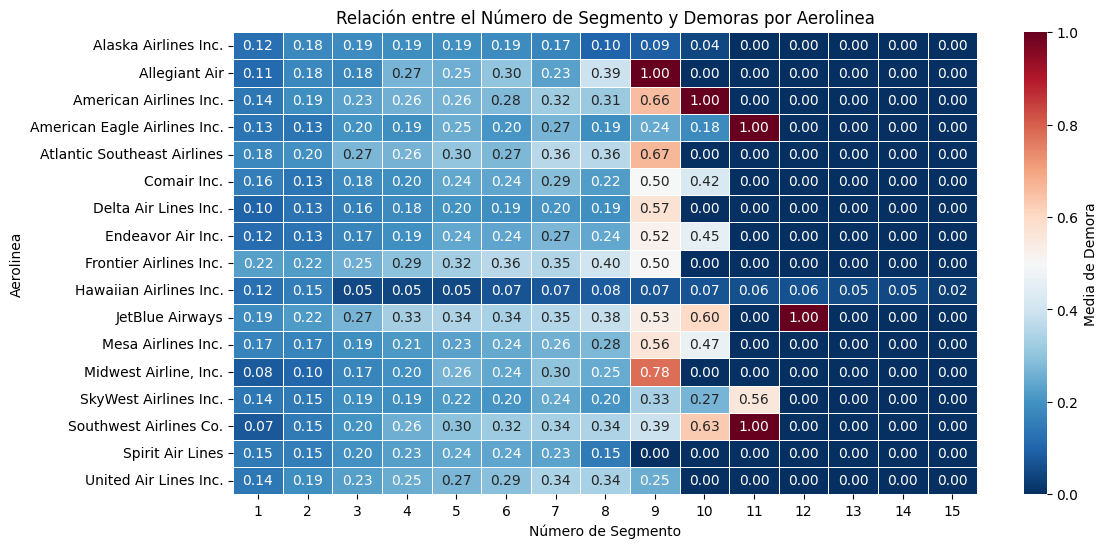

In [81]:
# Creamos la tabla de contingencia
df_contingency = df.pivot_table(values='DEP_DEL15',
                                         index='CARRIER_NAME',
                                         columns='SEGMENT_NUMBER',
                                         aggfunc='mean',
                                         fill_value=0)

# Grafico
plt.figure(figsize=(12, 6))
sns.heatmap(df_contingency, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Media de Demora'})
plt.title('Relación entre el Número de Segmento y Demoras por Aerolinea')
plt.xlabel('Número de Segmento')
plt.ylabel('Aerolinea')

plt.show()

**CONCLUSIÓN**

1. Se puede observar con el primer gráfico de la izquierda que más del 60% de la operación se encuentra concentrada en 5 aerolíneas principalmente, siendo que 3 aerolíneas controlan casi el 50% del mercado aerocomercial.

2. La puntualidad que ofrece la oferta es del 80% de media. Siendo la línea aérea más puntual es Hawaiian Airlines, mientras que la línea aérea con la menor puntualidad es Frontier Airlines, seguida por JetBlue Airways.

3. En relación con las líneas aéreas con mayor participación en el mercado ofrecen una media del 81% de puntualidad, siendo Delta Airlines, mientras que Southwest es la aerolínea es la que menor puntualidad ofrece.

4. La distancia recorrida en las rutas que ofrece cada una de las aerolíneas, se puede ver que la mayoría de las compañías operan en vuelos de corta y mediana distancia.

5. A su vez, se oberva que las líneas aéreas clásicas (American Airlines, Delta Airlines y United) son las que mayor cantidad de vuelos de larga distancia.

6. Se observa que la posibilidad de sufrir una demora aumenta con el número de segmento, es decir, a apartir del segmento 9 la mayoría de vuelos tuvieron demora.

####Análisis - Climatología

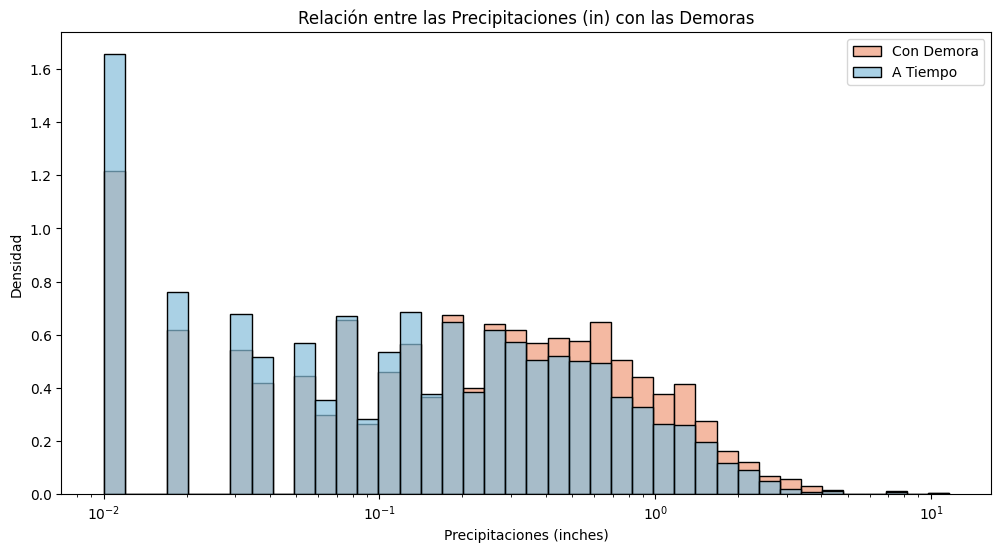

In [34]:
# Filtramos los vuelos con y sin demora
df_delayed = df[df['DEP_DEL15'] == 1]
df_not_delayed = df[df['DEP_DEL15'] == 0]

# Obtenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

plt.figure(figsize=(12, 6))

# Graficamos el histograma para los vuelos con demora
sns.histplot(df_delayed['PRCP'], color=colors[4], label='Con Demora', stat="density", bins=40, alpha=0.7, log_scale=True)

# Graficamos el histograma para los vuelos sin demora
sns.histplot(df_not_delayed['PRCP'], color=colors[1], label='A Tiempo', stat="density", bins=40, alpha=0.7, log_scale=True)

plt.title('Relación entre las Precipitaciones (in) con las Demoras')
plt.xlabel('Precipitaciones (inches)')
plt.ylabel('Densidad')
plt.legend()

plt.show()

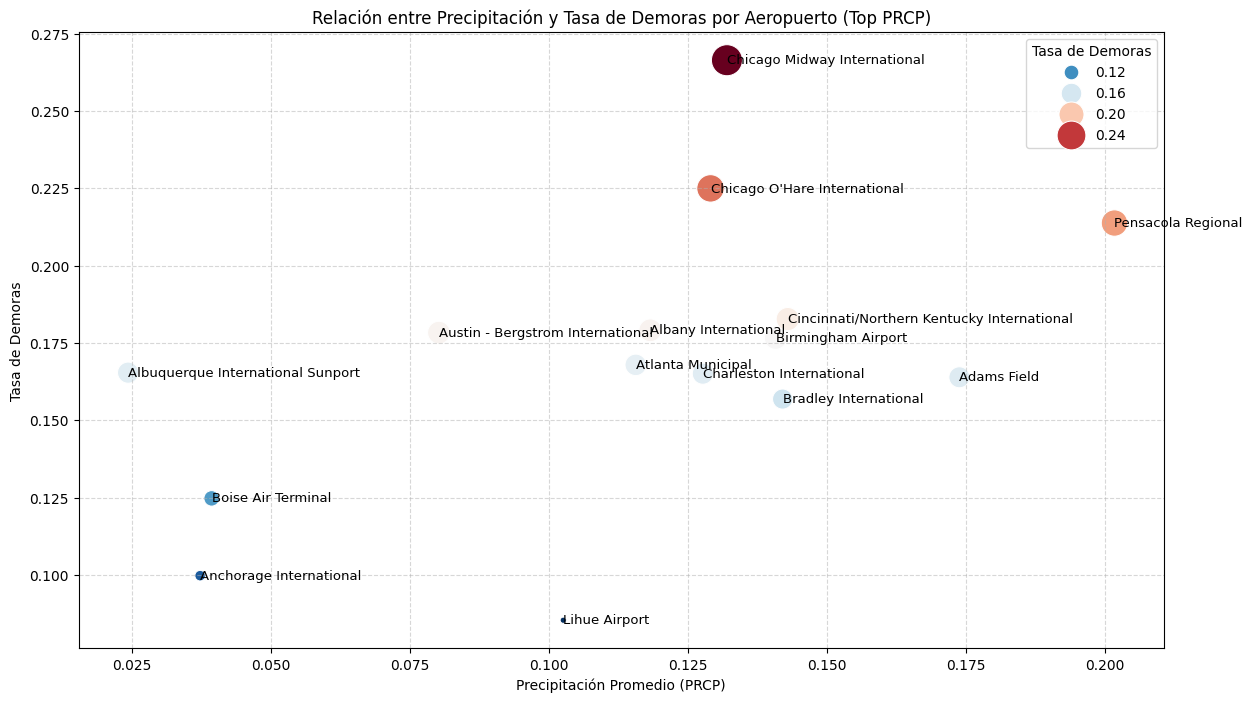

In [35]:
# Calculamos la mediana de PRCP por aeropuerto y seleccionar los 15 con mayor PRCP
top_airports = df.groupby('DEPARTING_AIRPORT')['PRCP'].median().nlargest(15).index

# Filtramow solo estos aeropuertos
df_filtered = df[df['DEPARTING_AIRPORT'].isin(top_airports)]

# Calculamow la tasa de demora por aeropuerto
df_delay_rate = df_filtered.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].mean().reset_index()
df_delay_rate.rename(columns={'DEP_DEL15': 'Delay_Rate'}, inplace=True)

# Calculamow el PRCP promedio por aeropuertocfiltrados
df_weather = df_filtered.groupby('DEPARTING_AIRPORT')[['PRCP']].mean().reset_index()

# Unimos los datasets
df_final = df_delay_rate.merge(df_weather, on='DEPARTING_AIRPORT')

# Graficamos
plt.figure(figsize=(14,8))
scatter = sns.scatterplot(data=df_final, x='PRCP', y='Delay_Rate', size='Delay_Rate', hue='Delay_Rate', palette="RdBu_r", sizes=(20, 500))

# Agregar etiquetas con los nombres de los aeropuertos
for i in range(df_final.shape[0]):
    plt.text(x=df_final['PRCP'][i], y=df_final['Delay_Rate'][i], s=df_final['DEPARTING_AIRPORT'][i],
             fontsize=9.5, ha='left',va='center')

plt.title('Relación entre Precipitación y Tasa de Demoras por Aeropuerto (Top PRCP)')
plt.xlabel('Precipitación Promedio (PRCP)')
plt.ylabel('Tasa de Demoras')
plt.legend(title="Tasa de Demoras")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

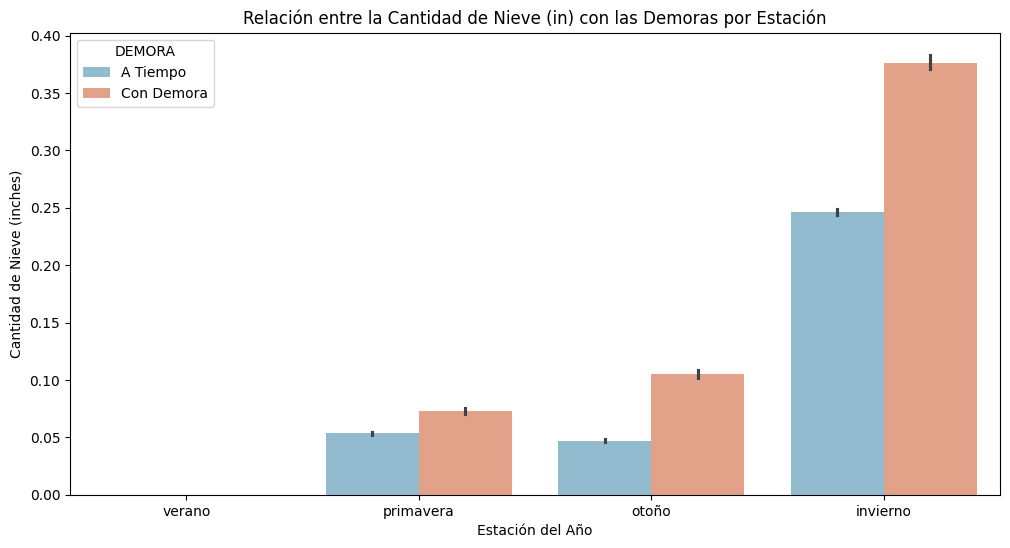

In [40]:
# Filtramos vuelos con y sin demora
df_delayed = df[df['DEP_DEL15'] == 1]
df_not_delayed = df[df['DEP_DEL15'] == 0]

# Creaamos un mapeo para los valores de DEP_DEL15
df['DEMORA'] = df['DEP_DEL15'].map({1: 'Con Demora', 0: 'A Tiempo'})

# Obtenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

# Gráficamos
plt.figure(figsize=(12, 6))
sns.barplot(y = df['SNWD'], x = df['season'], hue = df['DEMORA'], palette=[colors[1],colors[4]])
plt.title('Relación entre la Cantidad de Nieve (in) con las Demoras por Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Nieve (inches)')


# Mostrar el gráfico
plt.show()

<ipython-input-43-0b4eb7f9f7f0>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = season_flights[index]  # Total de vuelos operados en esa estación


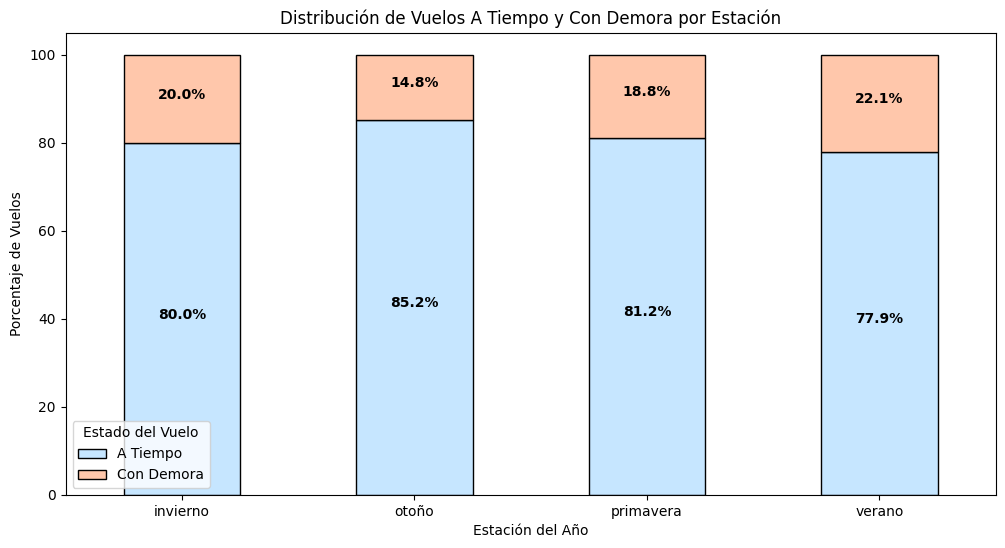

In [43]:
# Calcular la cantidad total de vuelos por estación
season_flights = df['season'].value_counts().sort_index()

# Calcular la cantidad de vuelos demorados por estación
season_delayed_flights = df[df['DEP_DEL15'] == 1]['season'].value_counts().sort_index()

# Calcular la cantidad de vuelos sin demora por estación
season_on_time_flights = season_flights - season_delayed_flights

# Crear DataFrame con los resultados
df_plot = pd.DataFrame({
    'A Tiempo': season_on_time_flights,
    'Con Demora': season_delayed_flights
}).fillna(0)

# Calcular los porcentajes
df_percentage = df_plot.div(season_flights, axis=0) * 100

# Crear gráfico de barras apiladas
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(12, 6),
                        color=["#c6e6ff", "#ffc7ab"], edgecolor='black')

# Configuración del gráfico
plt.title('Distribución de Vuelos A Tiempo y Con Demora por Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Porcentaje de Vuelos')
plt.xticks(rotation=0)
plt.legend(title="Estado del Vuelo")

# Mostrar los porcentajes y las cantidades dentro de las barras
for index, (on_time, delayed) in enumerate(zip(df_percentage["A Tiempo"], df_percentage["Con Demora"])):
    total = season_flights[index]  # Total de vuelos operados en esa estación
    # Mostrar los porcentajes dentro de las barras
    plt.text(index, on_time / 2, f"{on_time:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')
    plt.text(index, on_time + delayed / 2, f"{delayed:.1f}%", ha='center', fontsize=10, color='black', fontweight='bold')

# Mostrar el gráfico
plt.show()

**Conslusiones**

1. Se observa que la lluvia tiene un impacto en la demora de los vuelos, siendo visible que a mayor cantidad de presipitaciones la posibilidad de que un vuelo se demoré es mayor.

2. Durante la mayoría de las estaciones del año, la nieve tiene un impacto en las demoras, siendo evidente que cuando se superan los 0.05 mm de nieve en pista la probabilidad de demora aumenta en las estaciones de primavera y otoño.

3. En invierno, para que se produzca una demora se puede ver que incluso con valores 5 veces mayor al mencionado en el punto anterior, puede que no se porduzcan demoras.

4. En el verano, no existen registros de nieve en el dataset. Sin emabargo, es el mes en donde se producen mayores demoras.



<ipython-input-47-e79d1614c9dc>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


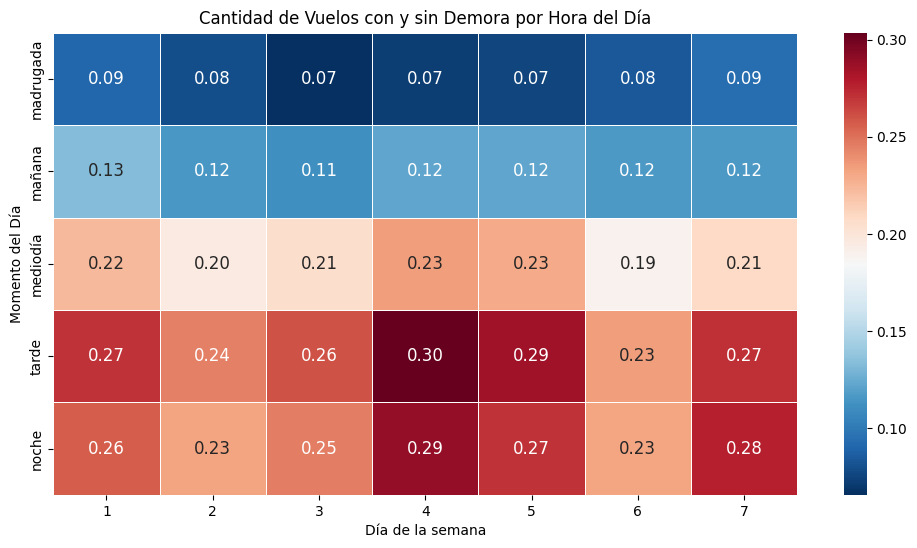

In [47]:
heatmap_data = pd.pivot_table(
    df,
    values='DEP_DEL15',
    index='moment',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)


# Obtenenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

# Graficamos
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdBu_r', cbar=True, linewidths=0.5, annot_kws={"size": 12})
plt.ylabel('Momento del Día')
plt.xlabel('Día de la semana')
plt.title('Cantidad de Vuelos con y sin Demora por Hora del Día')

plt.show()

<ipython-input-49-ad0390dfcefe>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


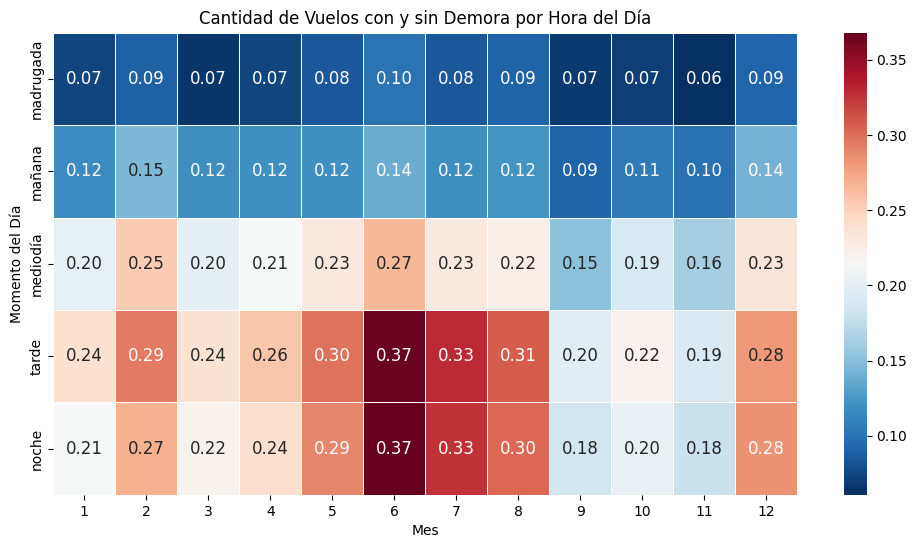

In [49]:
heatmap_data = pd.pivot_table(
    df,
    values='DEP_DEL15',
    index='moment',
    columns='MONTH',
    aggfunc='mean'
)


# Obtenenemos colores de la paleta RdBu
colors = sns.color_palette("RdBu_r", n_colors=6)

# Graficamos
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdBu_r', cbar=True, linewidths=0.5, annot_kws={"size": 12})
plt.ylabel('Momento del Día')
plt.xlabel('Mes')
plt.title('Cantidad de Vuelos con y sin Demora por Hora del Mes')

plt.show()

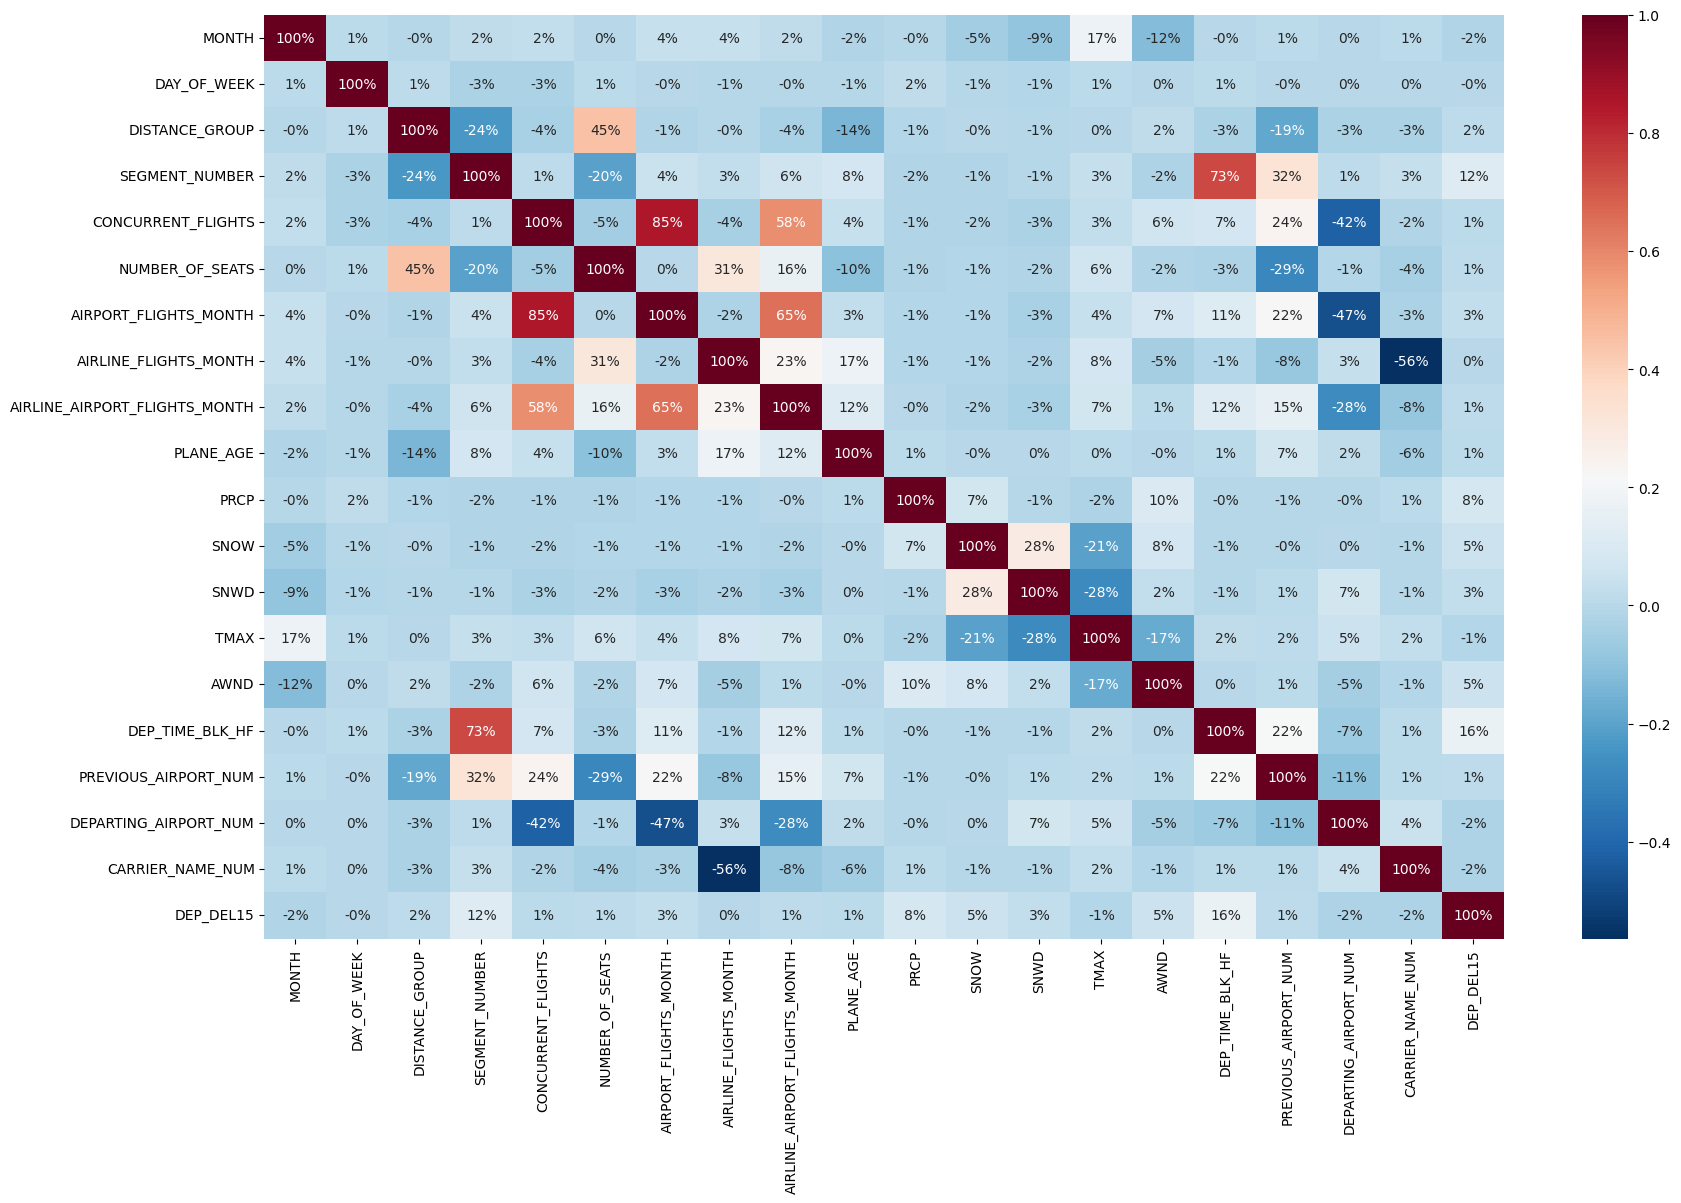

In [84]:
df_num = df[['MONTH','DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER','CONCURRENT_FLIGHTS',
             'NUMBER_OF_SEATS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH',
             'AIRLINE_AIRPORT_FLIGHTS_MONTH','PLANE_AGE','PRCP','SNOW','SNWD','TMAX','AWND',
             'DEP_TIME_BLK_HF','PREVIOUS_AIRPORT_NUM','DEPARTING_AIRPORT_NUM','CARRIER_NAME_NUM','DEP_DEL15'
             ]]
corr_matrix = df_num.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt="0.0%", cmap='RdBu_r')

plt.show()

Podemos notar que con la correlación no existe una relación directa entre las variables y la variable objetivo. Por lo cual, debemos entender si existe alguna relación entre las variables.

### CONCLUSIONES DEL EDA

Con este análisis pudimos ver que no existe una relación directa entre la variable objetivo y alguna de las variables. Sin embargo, si podemos encontrar relaciones entre varias variables y la variable objetivo, es decir, la predicción de nuestra variable objetivo se deberá a una combinación de variables, que en un principio no tenían una relación directa, pero luego con la exploratoria pudimos encontrar algunos patrones, por ejemplo, la hora del día y la cantidad de demoras registradas.

Esto será muy útil a partir de ahora, ya que poder entender como se relacionan estas variables permitirán desarrollar el modelo.